#Introducción a Ecuaciones Diferenciales Numéricas 🦠🧫⬆⬆⬆

Las ecuaciones diferenciales son fundamentales en la ciencia y la ingeniería para modelar diversos fenómenos naturales y técnicos. Sin embargo, muchas de estas ecuaciones no se pueden resolver con métodos analíticos, y aquí es donde entran en juego los métodos numéricos. En Python, gracias a su flexibilidad y a bibliotecas como NumPy y SciPy, podemos implementar estos métodos de forma eficiente. Vamos a explorar tres métodos numéricos populares: Euler, Euler Modificado y Runge-Kutta de cuarto orden (RK4).

1. Método de Euler
El método de Euler es el más simple y sirve como punto de entrada perfecto en el campo de las ecuaciones diferenciales numéricas. Utiliza la tangente a la curva en un punto conocido para predecir el valor de la función en un punto futuro, avanzando en pequeños pasos o 'incrementos' definidos por un tamaño de paso h.

Aunque es fácil de implementar y entender, su precisión depende altamente del tamaño de paso, y puede ser inestable o impreciso con funciones altamente variables o en intervalos largos.

2. Euler Modificado (Mejorado)
Para mejorar la precisión del método de Euler, el método de Euler Modificado, a veces conocido como método de Heun, toma "dos pasos" en lugar de uno. Primero, hace una predicción utilizando el método de Euler y luego corrige esta predicción calculando la pendiente tanto al inicio como al final del intervalo, promediando estas dos pendientes. Este método tiende a ser más preciso que el método de Euler estándar, aunque sigue siendo una técnica de baja orden, y su precisión y estabilidad aún están limitadas.

3. Runge-Kutta de cuarto orden (RK4)
El método RK4 es uno de los métodos numéricos más utilizados para resolver ecuaciones diferenciales ordinarias debido a su balance entre precisión y eficiencia computacional. Es un método de orden superior que calcula varios 'pasos' intermedios (cuatro, en este caso) para predecir el valor de la función, basándose en un promedio ponderado de las pendientes en estos puntos intermedios.

Aunque es más complejo en su implementación que los métodos de Euler, RK4 es significativamente más preciso y estable, y puede funcionar bien con un tamaño de paso más grande, lo que lo hace preferible en muchas aplicaciones científicas y de ingeniería.

## Tasa de crecimiento de bacterias

![](https://tricolor-scilla-68c.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F49aeb592-2818-4222-9e20-3fc913a9d52d%2FUntitled.png?table=block&id=9e0168d7-74ff-4fd8-9533-ad48a8a27c49&spaceId=62aa27de-48fd-4703-8a40-2de64b627b11&width=1310&userId=&cache=v2)



In [3]:
import sympy as sy
from sympy import sin,exp
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sy.init_printing() # para entender las expresiones simbólicas

In [4]:

t = sy.Symbol('t')
p = sy.Function('p')
mu = sy.Symbol('mu') # definir

ed_bacterias = sy.Eq(p(t).diff(),mu*p(t))
#ed_bacterias
sy.dsolve(ed_bacterias,p(t))

CI={p(0):200}
sy.dsolve(ed_bacterias,p(t), ics=CI)

            μ⋅t
p(t) = 200⋅ℯ   

In [6]:
# Función de crecimiento poblacional
def f_poblacion(t):
    A0 = 200  # Población inicial
    mu = 0.05  # Tasa de crecimiento
    return A0 * np.exp(mu * t)

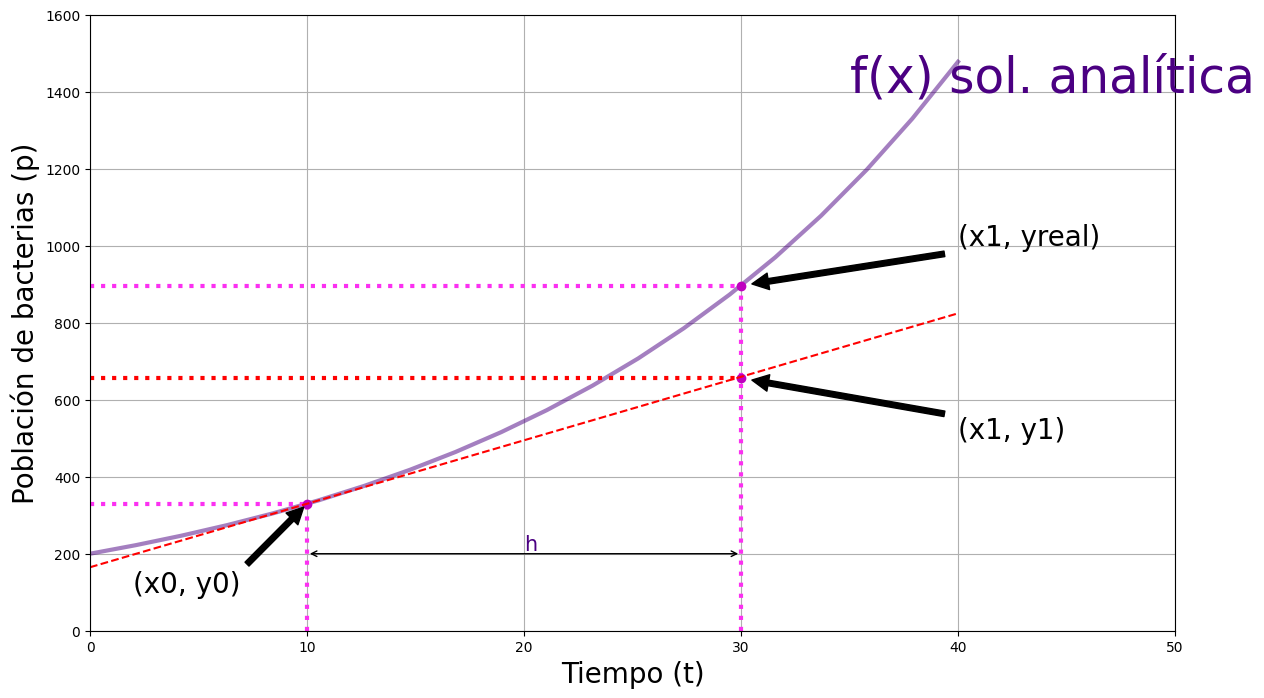

In [9]:
# Definición de los valores de x y y
x = np.linspace(0, 40, 20)
y = f_poblacion(x)

# Puntos de interés
x0 = 10
y0 = f_poblacion(x0)
h = 2

x1 = 30
yreal = f_poblacion(x1)

# Gráfico
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))

# Título del gráfico
ax.text(35, 1400, r'f(x) sol. analítica', fontsize=35, color='#4b0082')

# Curva de la solución analítica
ax.plot(x, y, color='#4b0082', linewidth=3,alpha=0.5)

# Punto (x0, y0)
ax.vlines(x=x0, ymin=0, ymax=y0, linewidth=3, linestyle=':', color='#fb30f1')
ax.hlines(y=y0, xmin=0, xmax=x0, linewidth=3, linestyle=':', color='#fb30f1')
ax.annotate('(x0, y0)', xy=(x0, y0), xytext=(2, 100), fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.05))

# Punto (x1, y1) aproximado
ax.vlines(x=x1, ymin=0, ymax=yreal, linewidth=3, linestyle=':', color='#fb30f1')
ax.hlines(y=656, xmin=0, xmax=x1, linewidth=3, linestyle=':', color='#ff0000')
ax.plot(x1, 656, 'om')
ax.annotate('(x1, y1)', xy=(x1, 656), xytext=(40, 500), fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.05))

# Punto (x1, yreal) exacto
ax.hlines(y=yreal, xmin=0, xmax=x1, linewidth=3, linestyle=':', color='#fb30f1')
ax.plot(x1, yreal, 'om')
ax.annotate('(x1, yreal)', xy=(x1, yreal), xytext=(40, 1000), fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.05))

# Indicación del paso h
ax.annotate('', xy=(x1, 200), xytext=(x0, 200), arrowprops=dict(arrowstyle='<->'))
ax.text(20, 210, r'h', fontsize=15, color='#4b0082')

# Tangente en (x0, y0)
a = x0
h = 0.001
fprime = (f_poblacion(a + h) - f_poblacion(a)) / h  # Derivada
tan = f_poblacion(a) + fprime * (x - a)  # Tangente
ax.plot(a, f_poblacion(a), 'om', x, tan, '--r')

# Etiquetas de los ejes
ax.set_xlabel('Tiempo (t)', fontsize=20)
ax.set_ylabel('Población de bacterias (p)', fontsize=20)

# Limitar ejes
ax.axis([0, 50, 0, 1600])

# Configuración de los ejes
ax.grid(True)
plt.show()


### Variando el N = 1

## **Variando el N** = 1,3 y5

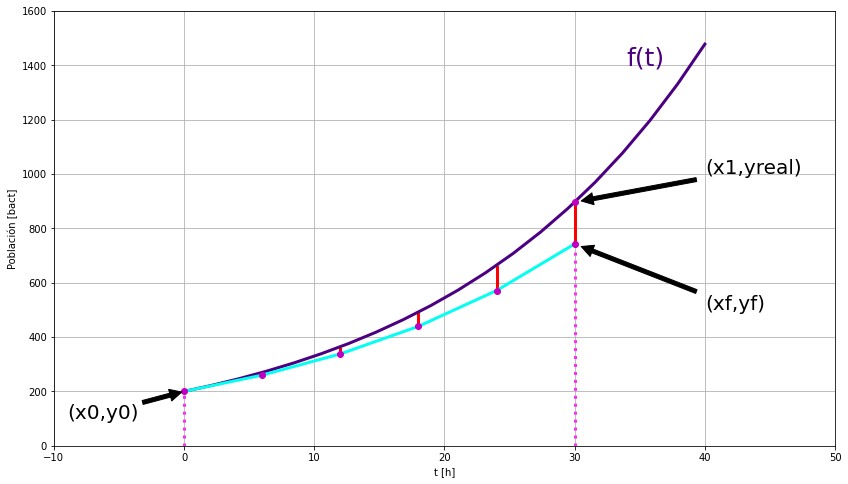

In [ ]:

def f_poblacion(t):
  A0 = 200
  mu = 0.05
  return A0*np.exp(mu*t)


x = np.linspace(0,40,20)
y = f_poblacion(x)

x0 = a = 0
y0 = f_poblacion(x0)
h = 2

x1 = b = 30
yreal = f_poblacion(b)


fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,8))

ax.text(34, 1400, r'f(t)', fontsize=25,color='#4b0082')

# solución analítica
ax.plot(x,y,color='#4b0082', linewidth=3)

## x0,y0
ax.vlines(x=x0, ymin=0, ymax=y0 ,linewidth=3,linestyle=':',color='#fb30f1')
ax.hlines(y = y0, xmin = 0, xmax = x0, linewidth=3,linestyle=':',color='#fb30f1')
ax.annotate('(x0,y0)', xy=(x0,y0), xytext=(-9, 100),fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.05))

## x1,y1
ax.vlines(x=b, ymin=0, ymax=yreal ,linewidth=3,linestyle=':',color='#fb30f1')



## x1,yreal

ax.plot(x1,yreal,'om')

ax.annotate('(x1,yreal)', xy=(x1, yreal), xytext=(40, 1000),fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.05))


# N =1
#euler_t = [0, 30.0]
#euler_p = [200, 500.0]
#N = 3
#euler_t = [0, 10.0, 20.0, 30.0]
#euler_p = [200, 300.0, 450.0, 675.0]
# N = 5
euler_t = [0, 6.0, 12.0, 18.0, 24.0, 30.0]
euler_p = [200, 260.0, 338.0, 439.4, 571.22, 742.586]


ax.plot(euler_t,euler_p,color='#04fff2', linewidth=3)

ax.plot(euler_t,euler_p,'om')
ax.annotate('(xf,yf)', xy=(euler_t[-1],euler_p[-1]), xytext=(40, 500),fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.05))



ax.vlines(x=euler_t, ymin=euler_p, ymax=f_poblacion(np.array(euler_t)) ,linewidth=3,linestyle='-',color='#ff0000')

ax.set_xlabel('t [h]')
ax.set_ylabel('Población [bact]')

ax.axis([-10, 50, 0 , 1600])


ax.grid(True)
plt.show()

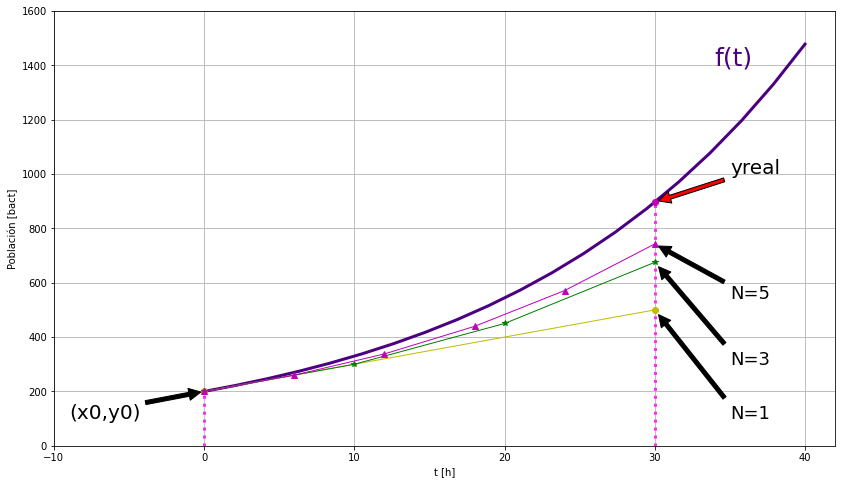

In [ ]:


x = np.linspace(0,40,20)
y = f_poblacion(x)

x0 = a = 0
y0 = f_poblacion(x0)
h = 2

x1 = b = 30
yreal = f_poblacion(b)


fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,8))

ax.text(34, 1400, r'f(t)', fontsize=25,color='#4b0082')

# solución analítica
ax.plot(x,y,color='#4b0082', linewidth=3)

## x0,y0
ax.vlines(x=x0, ymin=0, ymax=y0 ,linewidth=3,linestyle=':',color='#fb30f1')
ax.hlines(y = y0, xmin = 0, xmax = x0, linewidth=3,linestyle=':',color='#fb30f1')
ax.annotate('(x0,y0)', xy=(x0,y0), xytext=(-9, 100),fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.05))

## x1,y1
ax.vlines(x=b, ymin=0, ymax=yreal ,linewidth=3,linestyle=':',color='#fb30f1')



## x1,yreal
ax.annotate('yreal', xy=(b, yreal), xytext=(35, 1000),fontsize=20,
            arrowprops=dict(facecolor='red', shrink=0.05))
ax.plot(b,yreal,'om')



# N =1
euler_t1 = [0, 30.0]
euler_p1 = [200, 500.0]
#N = 3
euler_t3 = [0, 10.0, 20.0, 30.0]
euler_p3 = [200, 300.0, 450.0, 675.0]
# N = 5
euler_t5 = [0, 6.0, 12.0, 18.0, 24.0, 30.0]
euler_p5 = [200, 260.0, 338.0, 439.4, 571.22, 742.586]


ax.plot(euler_t1,euler_p1,color='y', linewidth=1)
ax.plot(euler_t1,euler_p1,'oy')
ax.annotate('N=1', xy=(euler_t1[-1],euler_p1[-1]), xytext=(35, 100),fontsize=18,
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.plot(euler_t3,euler_p3,color='g', linewidth=1)
ax.plot(euler_t3,euler_p3,'*g')

ax.annotate('N=3', xy=(euler_t3[-1],euler_p3[-1]), xytext=(35, 300),fontsize=18,
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.plot(euler_t5,euler_p5,color='m', linewidth=1)
ax.plot(euler_t5,euler_p5,'^m')

ax.annotate('N=5', xy=(euler_t5[-1],euler_p5[-1]), xytext=(35, 540),fontsize=18,
            arrowprops=dict(facecolor='black', shrink=0.05))


ax.set_xlabel('t [h]')
ax.set_ylabel('Población [bact]')

ax.axis([-10, 42, 0 , 1600])


ax.grid(True)
plt.show()

## Ayuda

In [ ]:
# N =1
euler_t = [0, 30.0]
euler_p = [200, 500.0]
#N = 3
#euler_t = [0, 10.0, 20.0, 30.0]
#euler_p = [200, 300.0, 450.0, 675.0]
# N = 5
#euler_t = [0, 6.0, 12.0, 18.0, 24.0, 30.0]
#euler_p = [200, 260.0, 338.0, 439.4, 571.22, 742.586]

In [ ]:
d = {'xi': euler_t, 'yi': euler_p, 'y_solucion':f_poblacion(np.array(euler_t))}
df = pd.DataFrame(data=d)
df

,xi,yi,y_solucion
0,0.0,200.0,200.000000
1,30.0,500.0,896.337814


## Programar

In [ ]:
def Euler(df,x,y,xF,N):
    X = []
    Y = []
    X.append(x)
    Y.append(y)
    h = float(xF-x)/N
    for i in range(1,N):
      y = y + df(x,y)*h
      x = x+h
      X.append(x)
      Y.append(y)
    return (X,Y)

In [ ]:
def df(x,y):
  return 0.05*y

In [ ]:
euler_t, euler_p = Euler(df,0,200,30,1)

## Ejercicios
![](https://tricolor-scilla-68c.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2Ffc29c86b-8f73-4a02-aa2e-ce776477c9b5%2FUntitled.png?table=block&id=802c92f5-e697-4c79-b540-4a4311411dd0&spaceId=62aa27de-48fd-4703-8a40-2de64b627b11&width=1520&userId=&cache=v2)

# EULER modificado

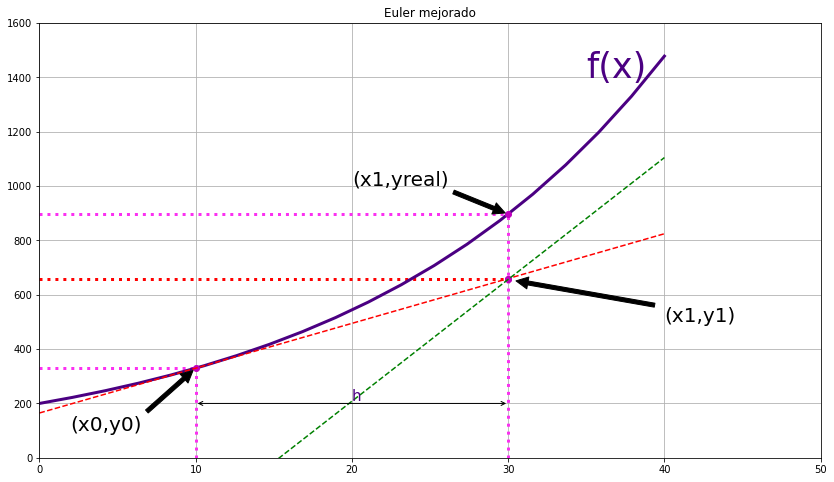

In [ ]:
## USAR SOLAMENTE PARA ILUSTRAR EL MÉTODO.
def f_poblacion(t):
  A0 = 200
  mu = 0.05
  return A0*np.exp(mu*t)


x = np.linspace(0,40,20)
y = f_poblacion(x)

x0 = 10
y0 = f_poblacion(x0)
h = 2

x1 = 30
yreal = f_poblacion(x1)


fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,8))

ax.text(35, 1400, r'f(x)', fontsize=35,color='#4b0082')

ax.plot(x,y,color='#4b0082', linewidth=3)

## x0,y0
ax.vlines(x=x0, ymin=0, ymax=y0 ,linewidth=3,linestyle=':',color='#fb30f1')
ax.hlines(y = y0, xmin = 0, xmax = x0, linewidth=3,linestyle=':',color='#fb30f1')
ax.annotate('(x0,y0)', xy=(x0,y0), xytext=(2, 100),fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.05))

## x1,y1
ax.vlines(x=x1, ymin=0, ymax=yreal ,linewidth=3,linestyle=':',color='#fb30f1')
ax.hlines(y = 656, xmin = 0, xmax = x1, linewidth=3,linestyle=':',color='#ff0000')
ax.plot(x1,656,'om')

ax.annotate('(x1,y1)', xy=(x1, 656), xytext=(40, 500),fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.05))

## x1,yreal
ax.hlines(y = yreal, xmin = 0, xmax = x1, linewidth=3,linestyle=':',color='#fb30f1')
ax.plot(x1,yreal,'om')

ax.annotate('(x1,yreal)', xy=(x1, yreal), xytext=(20, 1000),fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.05))

#### h

plt.annotate(s='', xy=(x1,200), xytext=(x0,200), arrowprops=dict(arrowstyle='<->'))
ax.text(20, 210, r'h', fontsize=15,color='#4b0082')

#ax.hlines(y = y0, xmin = x0, xmax = x1, linewidth=3,linestyle='-.',color='#023011')


a = x0
h=0.001
fprime1 = (f_poblacion(a+h)-f_poblacion(a))/h # derivative
#Se calcula la tangente
tan = f_poblacion(a)+fprime1*(x-a)  # tangent
ax.plot(a,f_poblacion(a),'om',x,tan,'--r')
#---
a = x1
fprime2 = (f_poblacion(a+h)-f_poblacion(a))/h # derivative
#Se calcula la tangente
tan = f_poblacion(a)+fprime2*(x-a)  # tangent
ax.plot(a,656,'om',x,tan -240 ,'--g')

ax.set_xlabel('')
ax.set_ylabel('')

ax.axis([0, 50, 0 , 1600])

#ax.set_xticks([])
#ax.set_yticks([])
ax.grid(True)
plt.title('Euler mejorado')
plt.show()

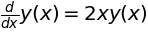

In [ ]:
import sympy as sy
import math
x = sy.Symbol('x')
y = sy.Function('y')


ed_2 = sy.Eq(y(x).diff(),2*x*y(x))
ed_2

In [ ]:
CI={y(1):3}
sy.dsolve(ed_2,y(x), ics=CI)

In [ ]:
def y_solucion(x):
  return 3*np.exp(x**2)/math.e

In [ ]:
def df2(x,y):
  return 2*x*y

In [ ]:
def EulerModificado(df,x,y,xF,N):
    X = []
    Y = []
    X.append(x)
    Y.append(y)
    h = float(xF-x)/N
    for i in range(N):
      y = y + 0.5*h*(df(x,y)+df(x+h,(y+h*2*x*y)))
      x = x+h
      X.append(x)
      Y.append(y)
    return (X,Y)

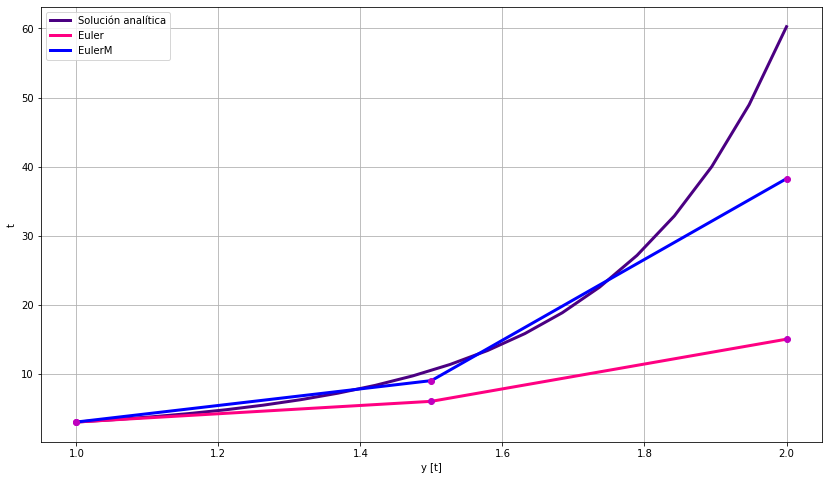

In [ ]:
x = np.linspace(1,2,20)
y = y_solucion(x)


fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,8))



# solución analítica
ax.plot(x,y,color='#4b0082', linewidth=3,label="Solución analítica")

# Euler
#euler_x, euler_y = Euler(df2,1,3,2,2)
ax.plot(euler_x, euler_y,color='#ff0082', linewidth=3,label="Euler")
ax.plot(euler_x,euler_y,'om')

#EulerModificado
eulerM_x, eulerM_y = EulerModificado(df2,1,3,2,2)
ax.plot(eulerM_x, eulerM_y,color='#0000ff', linewidth=3,label="EulerM")
ax.plot(eulerM_x,eulerM_y,'om')

#ax.plot(euler_t1,euler_p1,color='y', linewidth=1)

ax.set_xlabel('y [t]')
ax.set_ylabel('t')

#ax.axis([0, 3, 0 , 1])

ax.legend()
ax.grid(True)
plt.show()

In [ ]:
x0 = 1
y0 = 3
xf = 2
N = 2
h = (xf-x0)/N

In [ ]:

y1 = y0 + 0.5*h*(df2(x0,y0)+df2(x0+h,(y0+h*2*x0*y0)))
y1

In [ ]:
x1 = x0+h
y2  = y1 + 0.5*h*(df2(x1,y1)+df2(x1+h,(y1+h*2*x1*y1)))
y2

In [ ]:
d = {'xi': euler_x, 'y_e': euler_y,'y_eM':eulerM_y, 'y_solucion':y_solucion(np.array(euler_x))}
df = pd.DataFrame(data=d)
df

,xi,y_e,y_eM,y_solucion
0,1.0,3.0,3.00,3.000000
1,1.5,6.0,9.00,10.471029
2,2.0,15.0,38.25,60.256611


In [ ]:
y_solucion(1)

# Runge Kutta 4

In [ ]:
def RungeKutta4(df,x,y,xF,N):
    X = []
    Y = []
    X.append(x)
    Y.append(y)
    h = float(xF-x)/N
    for i in range(N):
      k1 = df(x,y)
      k2 = df(x+0.5*h,y +0.5*k1*h)
      k3 = df(x+0.5*h,y +0.5*k2*h)
      k4 = df(x+h,y + k3*h)
      y = y + (1/6)*(k1+2*k2+2*k3+k4)*h
      x = x+h
      X.append(x)
      Y.append(y)
    return (X,Y)

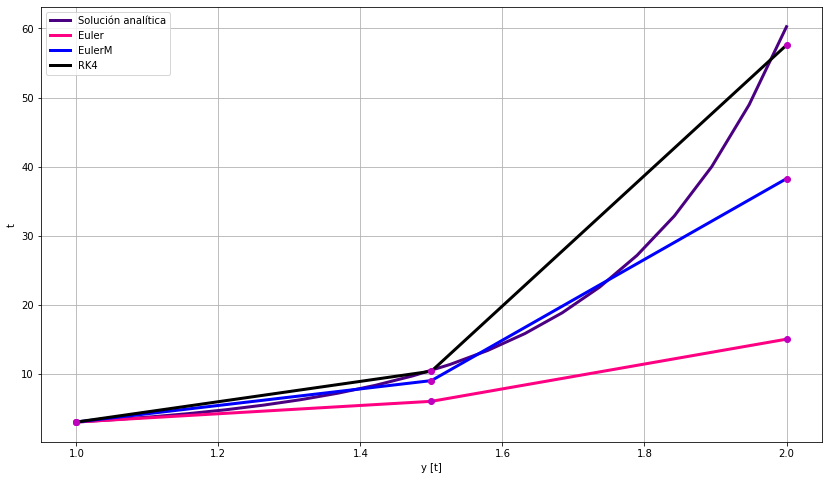

In [ ]:
x = np.linspace(1,2,20)
y = y_solucion(x)


fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,8))



# solución analítica
ax.plot(x,y,color='#4b0082', linewidth=3,label="Solución analítica")

# Euler
#euler_x, euler_y = Euler(df2,1,3,2,2)
ax.plot(euler_x, euler_y,color='#ff0082', linewidth=3,label="Euler")
ax.plot(euler_x,euler_y,'om')

#EulerModificado
eulerM_x, eulerM_y = EulerModificado(df2,1,3,2,2)
ax.plot(eulerM_x, eulerM_y,color='#0000ff', linewidth=3,label="EulerM")
ax.plot(eulerM_x,eulerM_y,'om')

#rk4
rk4_x, rk4_y =  RungeKutta4(df2,1,3,2,2)
ax.plot(rk4_x, rk4_y,color='#000000', linewidth=3,label="RK4")
ax.plot(rk4_x,rk4_y,'om')


ax.set_xlabel('y [t]')
ax.set_ylabel('t')

#ax.axis([0, 3, 0 , 1])

ax.legend()
ax.grid(True)
plt.show()

In [ ]:
d = {'xi': euler_x, 'y_e': euler_y,'y_eM':eulerM_y,'y_RK4':rk4_y, 'y_solucion':y_solucion(np.array(euler_x))}
df = pd.DataFrame(data=d)
df

,xi,y_e,y_eM,y_RK4,y_solucion
0,1.0,3.0,3.00,3.000000,3.000000
1,1.5,6.0,9.00,10.363281,10.471029
2,2.0,15.0,38.25,57.591777,60.256611
